In [13]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
# import pandas_profiling

Start from the last cleaned file

In [14]:
data = pd.read_csv('data/Cleaned_StateData_1.csv')
len(data), len(data.keys())

(2040, 532)

In [15]:
fields = pd.read_csv('data/field_separation.csv')
fields = fields[['Attribute', 'Category', 'Category Code', 'Property']]
fields = fields.loc[15:].reset_index(drop=True)
fields.head()

,Attribute,Category,Category Code,Property
0,Population,General,NaN,Population
1,FunctionCode,General,NaN,FunctionCode
2,Enrollment,General,NaN,Enrollment
3,Total_Revenue,General,NaN,Total Revenue
4,Total_Rev_Own_Sources,General,NaN,Total Rev Own Sources


In [16]:
data.head().T

,0,1,2,3,4
Year,2016,2016,2016,2016,2016
ID,10000000,20000000,30000000,40000000,50000000
State_Code,1,2,3,4,5
County,0,0,0,0,0
State,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA
FIPS_Code_State,1,2,4,5,6
FYEndDate,930,630,630,630,630
Population,4858979,738432,6828065,2978204,39144818
Total_Revenue,30172490,8060170,38241052,21431620,322332307
Total_Rev_Own_Sources,20650521,5206968,23700590,14000079,227996024


In [17]:
data = data.fillna(0)

In [18]:
print(len(data.keys()))
data.count().sort_index().keys().tolist()

532


['Air_Trans_Cap_Outlay',
 'Air_Trans_Construction',
 'Air_Trans_Current_Exp',
 'Air_Trans_Direct_Expend',
 'Air_Trans_IG_Local_Govts',
 'Air_Trans_Total_Expend',
 'Alcoholic_Beverage_Lic',
 'Alcoholic_Beverage_Tax',
 'Amusement_License',
 'Amusement_Tax',
 'Beg_LTD_Out_All_Other',
 'Beg_LTD_Out_Education',
 'Beg_LTD_Out_Elec_Util',
 'Beg_LTD_Out_Gas_Util',
 'Beg_LTD_Out_General',
 'Beg_LTD_Out_Other_NEC',
 'Beg_LTD_Out_Priv_Purp',
 'Beg_LTD_Out_Private_Purp',
 'Beg_LTD_Out_Trans_Util',
 'Beg_LTD_Out_Utility',
 'Beg_LTD_Out_Water_Util',
 'Bond_Fd_Cash___Sec',
 'Cen_Staff_Cap_Outlay',
 'Cen_Staff_Construction',
 'Cen_Staff_Current_Exp',
 'Cen_Staff_Direct_Exp',
 'Cen_Staff_IG_Local_Govts',
 'Cen_Staff_Total_Expend',
 'Chg_Air_Transportation',
 'Chg_All_Other_NEC',
 'Chg_Elem_Ed_NEC',
 'Chg_Elem_Ed_Sch_Lunch',
 'Chg_Elem_Ed_Tuition',
 'Chg_Highways',
 'Chg_Hospitals',
 'Chg_Housing___Comm_Dev',
 'Chg_Misc_Com_Activ',
 'Chg_Parking',
 'Chg_Parks___Recreation',
 'Chg_Regular_Highways',
 'Ch

Check the percentage of null/zero values in each column in the dataset 

In [19]:
def missing_data(df):
    missing_data = (~df.astype(bool)).sum().sort_values(ascending=False)
    missing_data = missing_data[missing_data>0]

    print('\033[4m \bNumber \b\033[0m of missing values per column:')
    print(missing_data)
    print()
    print("\033[4m \bPercentage \b\033[0m of missing values per column:")
    print(missing_data/len(df)*100)
    
    return missing_data

In [20]:
missing = missing_data(data)

 Number  of missing values per column:
Total_LTD_Ret_Unsp            2040
Total_LTD_Iss_Unsp            2040
LTD_Ret_Unsp_Other_NEC        2040
LTD_Iss_Unsp_Utility          2040
LTD_Iss_Unsp_Water_Util       2040
LTD_Iss_Unsp_General          2040
LTD_Iss_Unsp_Other_NEC        2040
LTD_Ret_Unsp_General          2040
LTD_Ret_Unsp_Water_Util       2040
LTD_Ret_Unsp_Utility          2040
State_IGR_Education           2039
LTD_Iss_FFC_Elec_Util         2039
LTD_Out_FFC_Elec_Util         2039
LTD_Ret_FFC_Elec_Util         2039
Total_State_IG_Revenue        2039
Prop_Sale_Hous_Com_Dev        2039
IG_Exp_To_State_Govt          2038
LTD_Iss_NG_Gas_Util           2038
Correct_IG_To_St              2038
LTD_Iss_Util_Gas_Supply       2038
Beg_LTD_Out_Gas_Util          2037
Beg_LTD_Out_Trans_Util        2037
Parking_IG_Local_Govts        2026
Beg_LTD_Out_Elec_Util         2025
LTD_Iss_FFC_Trans_Util        2025
LTD_Ret_NG_Gas_Util           2024
LTD_Ret_Util_Gas_Supply       2024
LTD_Out_Util_G

Let's delete all those columns with 100% data missing

In [21]:
keys = missing[missing == len(data)].keys().tolist()
print(len(data.keys()), '->', end=' ')
data = data.drop(columns=keys)
print(len(data.keys()))

532 -> 522


In [22]:
missing = missing_data(data)

 Number  of missing values per column:
LTD_Iss_FFC_Elec_Util         2039
LTD_Ret_FFC_Elec_Util         2039
Total_State_IG_Revenue        2039
Prop_Sale_Hous_Com_Dev        2039
State_IGR_Education           2039
LTD_Out_FFC_Elec_Util         2039
Correct_IG_To_St              2038
LTD_Iss_Util_Gas_Supply       2038
LTD_Iss_NG_Gas_Util           2038
IG_Exp_To_State_Govt          2038
Beg_LTD_Out_Gas_Util          2037
Beg_LTD_Out_Trans_Util        2037
Parking_IG_Local_Govts        2026
Beg_LTD_Out_Elec_Util         2025
LTD_Iss_FFC_Trans_Util        2025
LTD_Ret_Util_Gas_Supply       2024
LTD_Ret_NG_Gas_Util           2024
Gas_Util_Cap_Outlay           2023
LTD_Out_NG_Gas_Util           2023
Gas_Util_Construct            2023
LTD_Out_Util_Gas_Supply       2023
LTD_Iss_NG_Trans_Util         2018
LTD_Iss_Util_Transit          2018
Parking_Construction          2018
Beg_LTD_Out_Water_Util        2018
Gas_Util_Inter_Exp            2017
LTD_Out_FFC_Trans_Util        2015
LTD_Ret_FFC_Tr

In [23]:
good_keys = missing[missing < 0.01*len(data)].keys().tolist()
good_keys

['Total_Hospital_Cap_Out',
 'Higher_Ed_Construct',
 'Emp_Retire_Cash___Dep',
 'Health_Capital_Outlay',
 'Public_Welf_Cap_Outlay',
 'Cen_Staff_Cap_Outlay',
 'Gen_Pub_Bldg_Total_Exp',
 'Total_LTD_Issued',
 'Tot_Local_IG_Rev',
 'Occup_and_Bus_Lic_NEC',
 'Fed_IGR_Emp_Sec_Adm',
 'Insurance_Premium_Tax',
 'Police_Prot_Cap_Outlay',
 'Emp_Ret_Loc_Emp_Ctrib',
 'Correct_Cap_Outlay',
 'Sinking_Fd_Cash___Sec',
 'Welf_Categ_Total_Exp',
 'Higher_Ed_Cap_Outlay',
 'Emp_Ret_Int_Rev',
 'Emp_Retire_Total_Sec',
 'Emp_Retire_Sec_Tot_Nong',
 'Fed_IGR_Highways',
 'Fin_Admin_Cap_Outlay',
 'Parks___Rec_Cap_Outlay',
 'Unemp_Comp_Cash___Sec',
 'General_NEC_Cap_Outlay',
 'Emp_Sec_Adm_Current_Exp',
 'Fed_IGR_Other',
 'Emp_Retire_Cash___Sec',
 'Total_Hospital_Current_Exp',
 'Parks___Rec_Current_Exp',
 'Emp_Ret_Total_Ctrib',
 'Emp_Sec_Adm_Direct_Exp',
 'Total_Emp_Ret_Rev',
 'Total_Hospital_Dir_Exp',
 'Alcoholic_Beverage_Tax',
 'Emp_Ret_Benefit_Paymts',
 'Total_Educ_Construct',
 'Parks___Rec_Direct_Exp',
 'Parks___Re

### Alcoholic_Beverage_Tax

In [24]:
pivoted = pd.pivot_table(data, index=['State', 'Year'], values=good_keys)
pivoted.head()

Alcoholic_Beverage_Tax  Cen_Staff_Cap_Outlay  \
State   Year                                                 
ALABAMA 1977                   71249                    88   
        1978                   75847                    84   
        1979                   80198                   129   
        1980                   87493                   354   
        1981                   91642                   334   

              Correct_Cap_Outlay  Emp_Ret_Benefit_Paymts  Emp_Ret_Int_Rev  \
State   Year                                                                
ALABAMA 1977                1294                   84543            84289   
        1978                4629                   84226            90298   
        1979                1403                   92322           108738   
        1980                6961                  111421           138695   
        1981                8441                  111935           138853   

              Emp_Ret_Loc_Emp_Ctrib  Emp_Ret_Total_Ctrib  \
State   Year                                               
ALABAMA 1977                  62100                77369   
        1978                  63822                83802   
        1979                  73353                90783   
        1980                  81768               102550   
        1981                  81757               102577   

              Emp_Ret_Total_Expend  Emp_Retire_Cash___Dep  \
State   Year                                                
ALABAMA 1977                 94910                  16832   
        1978                 95197                  23880   
        1979                104642                  42678   
        1980                126139                  10084   
        1981                126652                  10021   

              Emp_Retire_Cash___Sec          ...           \
State   Year                                 ...            
ALABAMA 1977                1233842          ...            
        1978                1233785          ...            
        1979                1483149          ...            
        1980                1779888          ...            
        1981                1780699          ...            

              Total_Educ_Construct  Total_Emp_Ret_Rev  Total_Hospital_Cap_Out  \
State   Year                                                                    
ALABAMA 1977                 87684             161658                   18569   
        1978                 60048             174100                   18492   
        1979                 67432             199521                    7251   
        1980                 68000             241245                   17429   
        1981                 86226             241430                   11194   

              Total_Hospital_Current_Exp  Total_Hospital_Dir_Exp  \
State   Year                                                       
ALABAMA 1977                      150013                  168582   
        1978                      172197                  190689   
        1979                      192205                  199456   
        1980                      218854                  236283   
        1981                      251124                  262318   

              Total_Hospital_Total_Exp  Total_LTD_Issued  \
State   Year                                               
ALABAMA 1977                    170287             73193   
        1978                    191861             80815   
        1979                    199456            111108   
        1980                    236329             30794   
        1981                    262318            284697   

              Unemp_Comp_Cash___Sec  Welf_Categ_Total_Exp  \
State   Year                                                
ALABAMA 1977                  44315                 87844   
        1978                  94837                 88243   
        1979                 113822                1

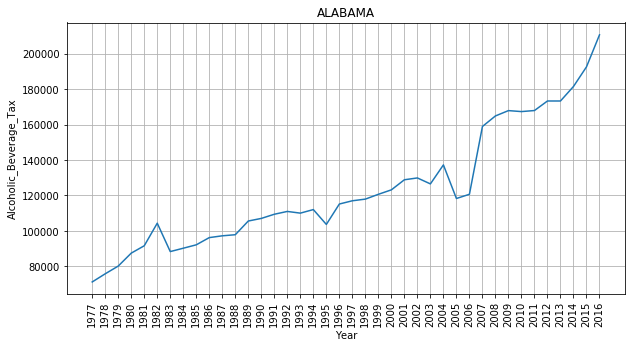

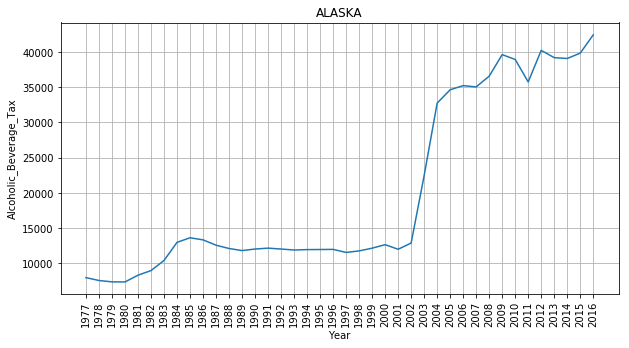

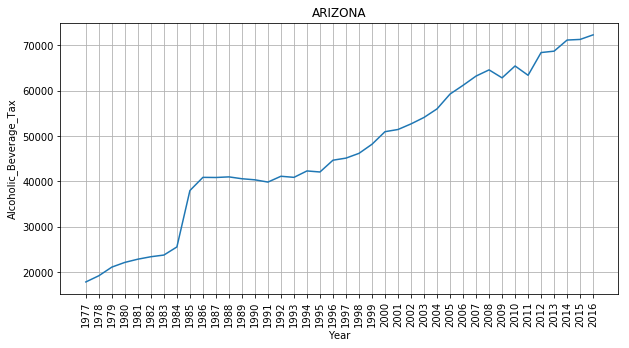

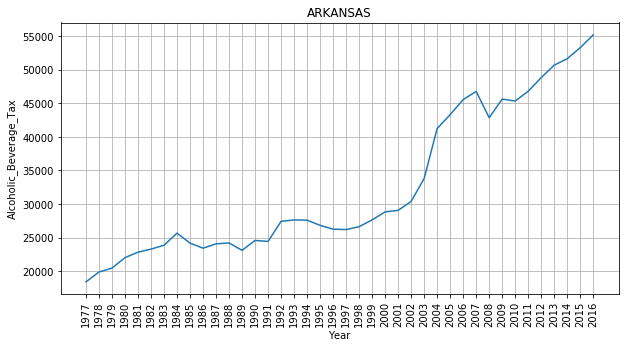

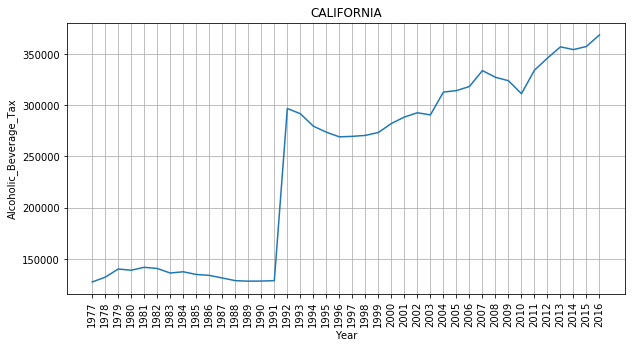

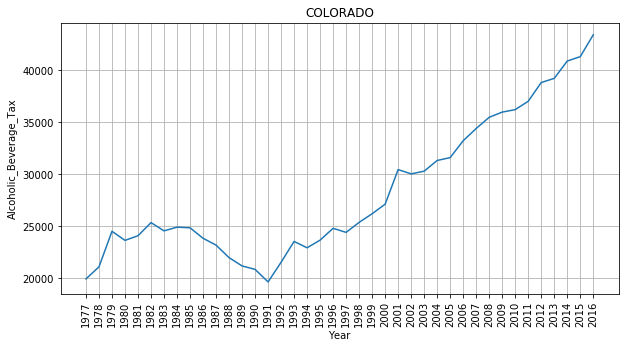

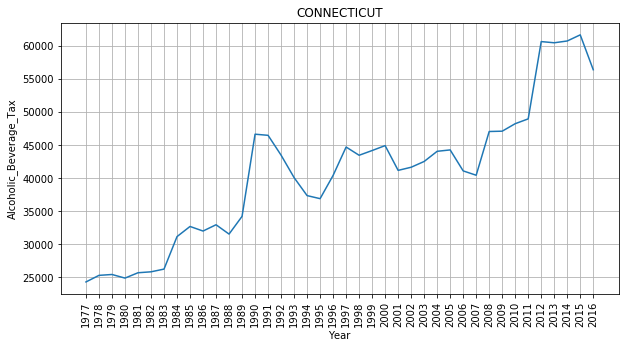

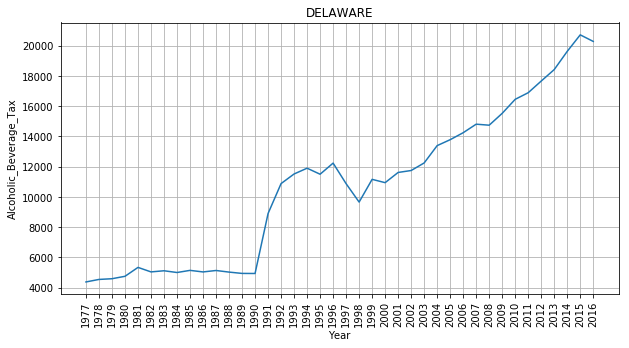

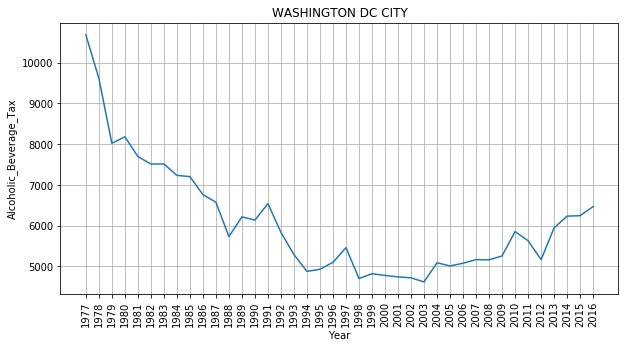

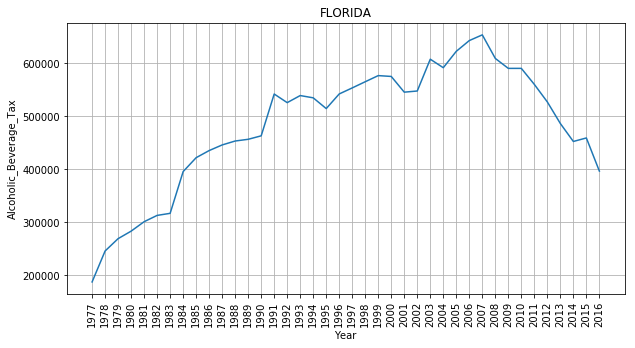

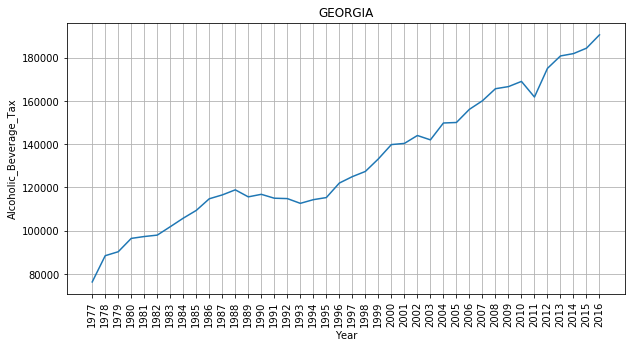

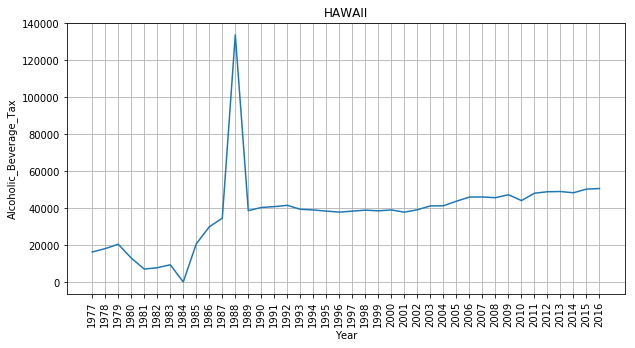

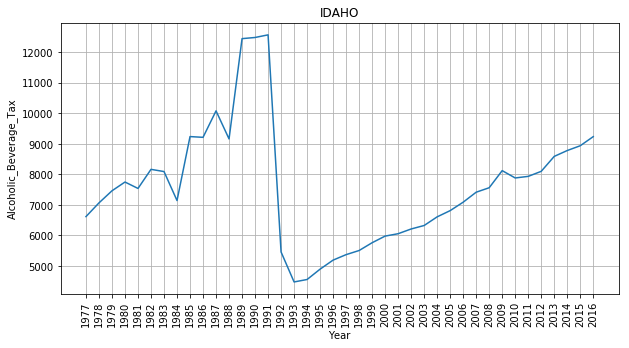

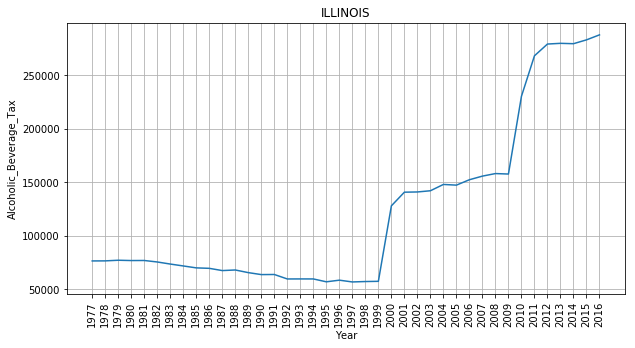

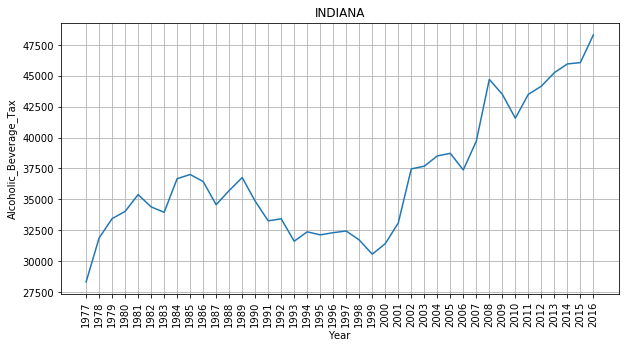

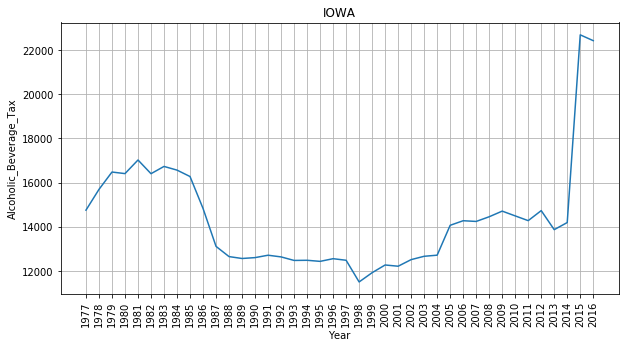

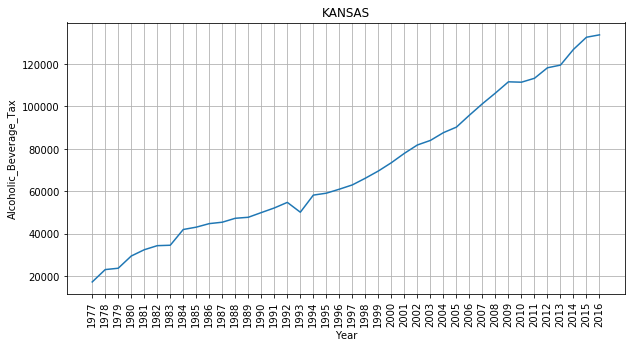

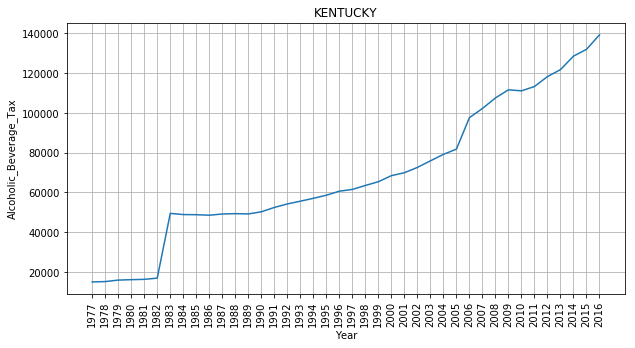

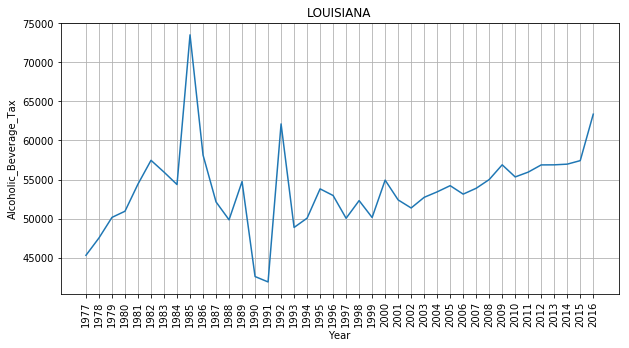

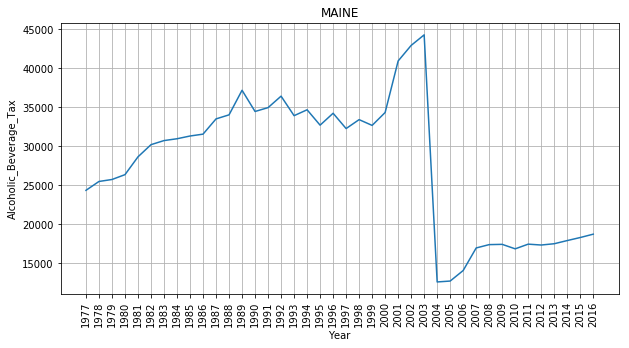

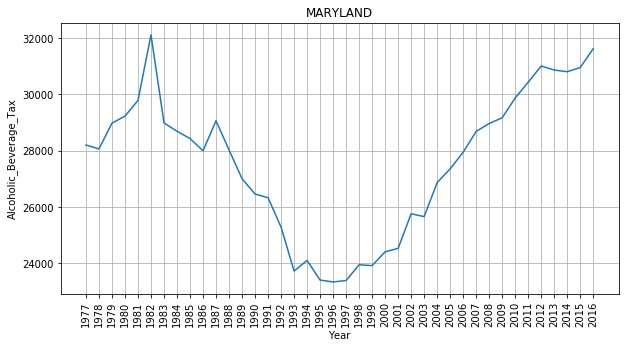

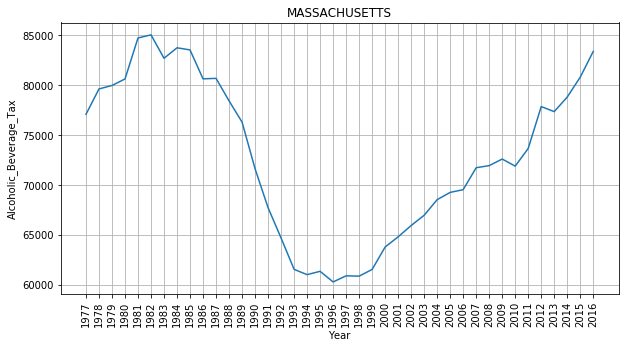

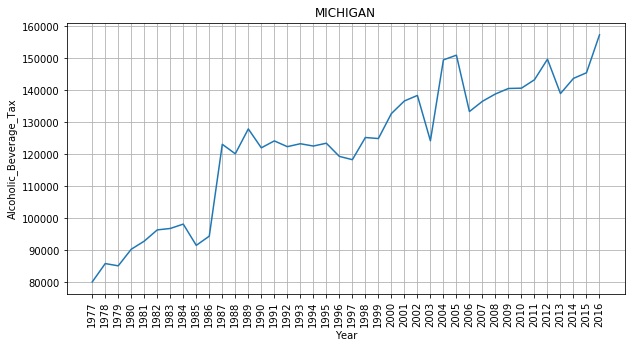

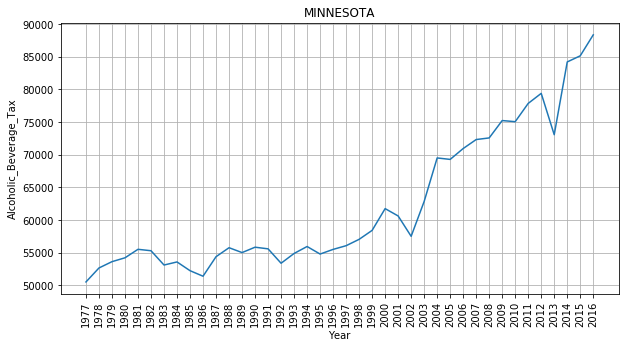

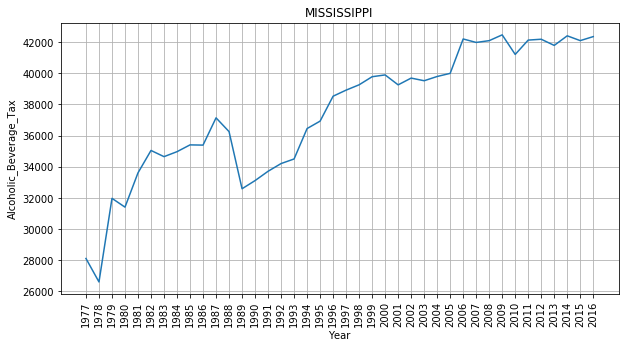

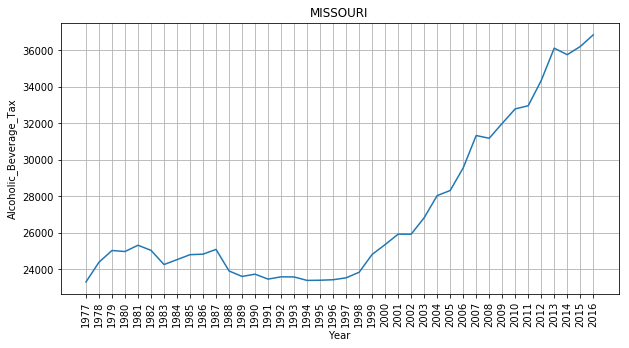

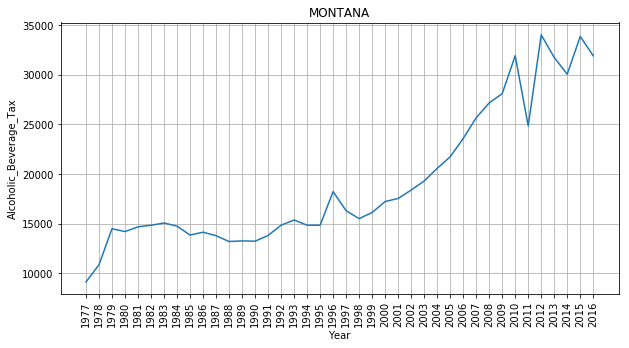

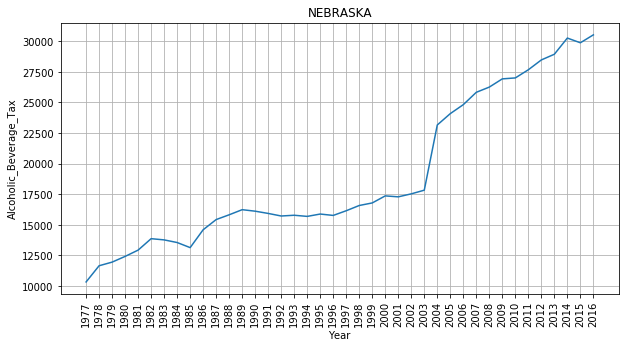

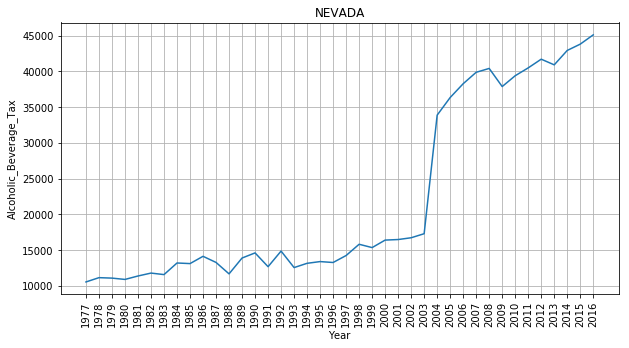

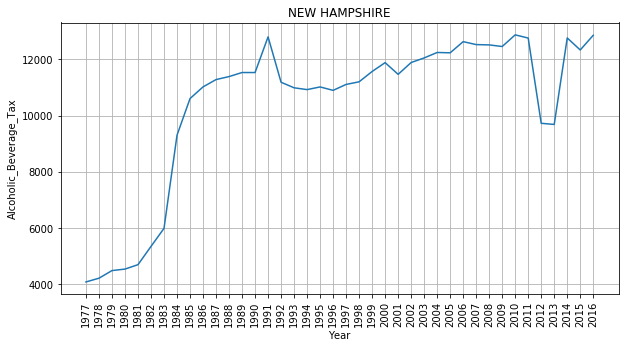

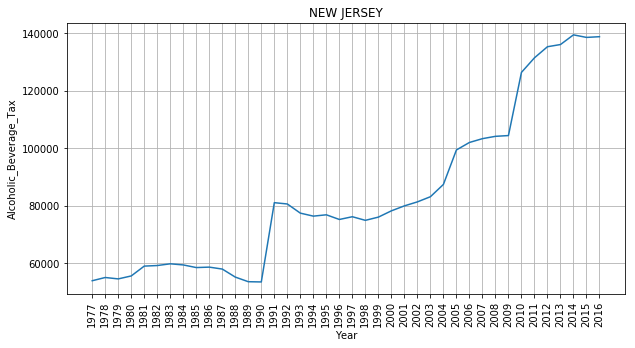

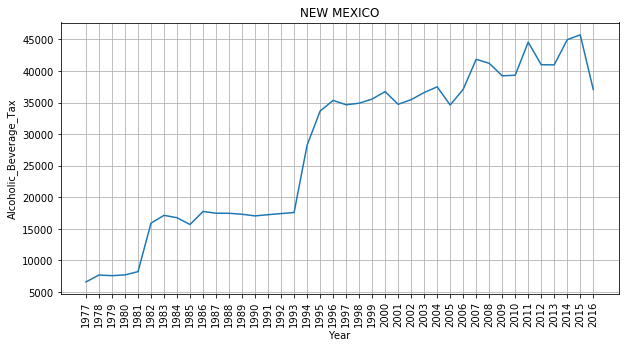

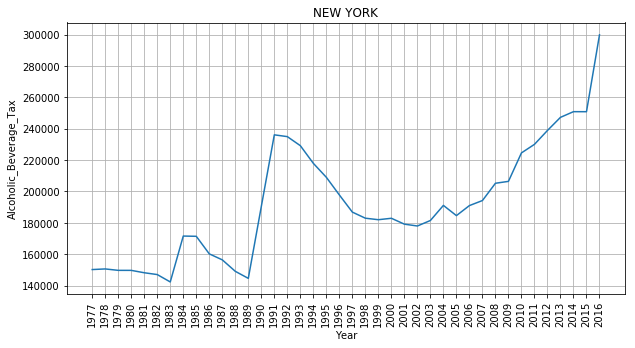

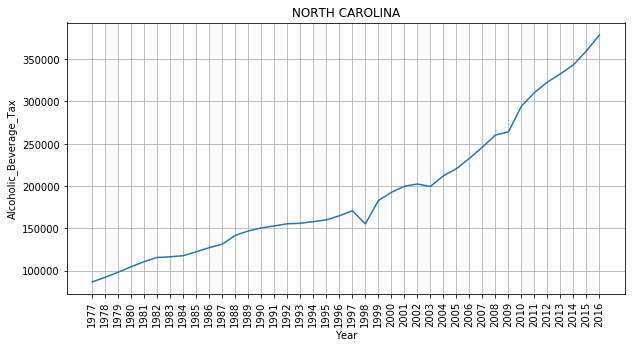

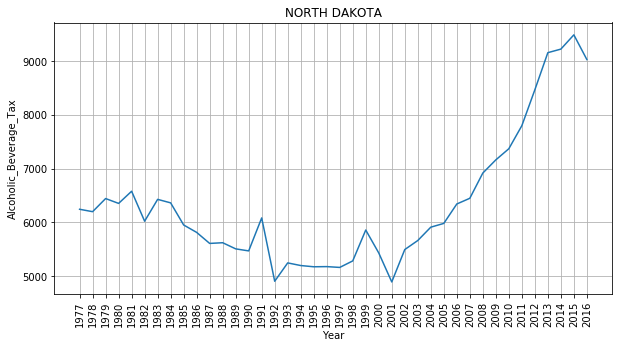

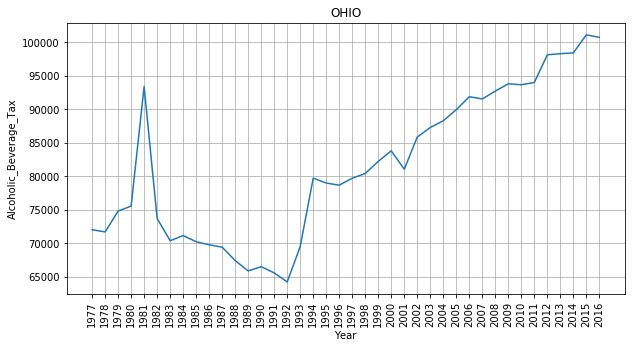

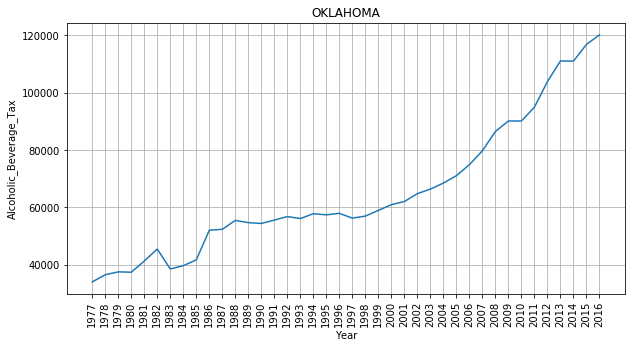

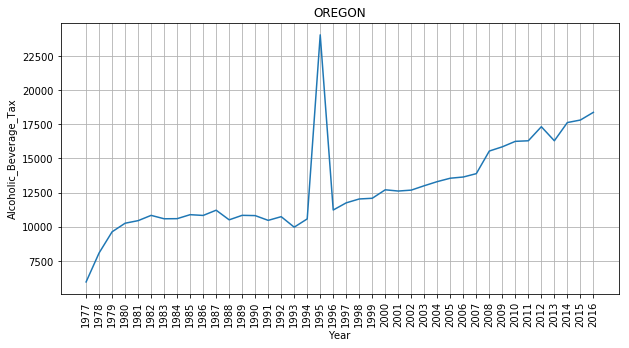

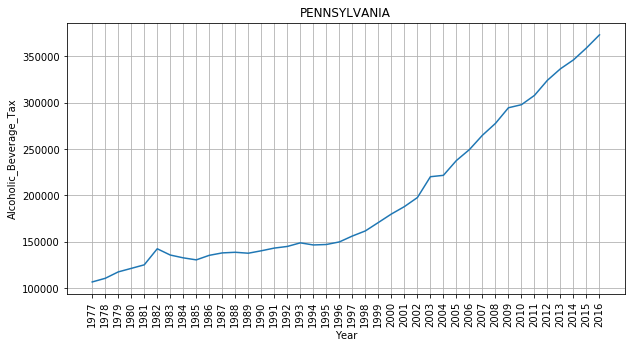

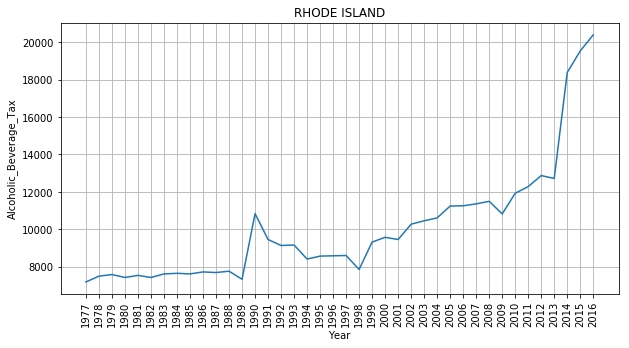

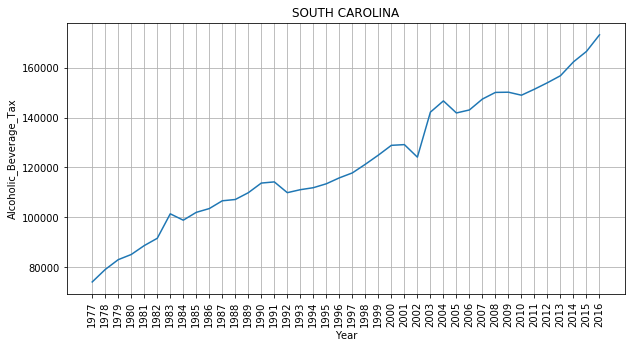

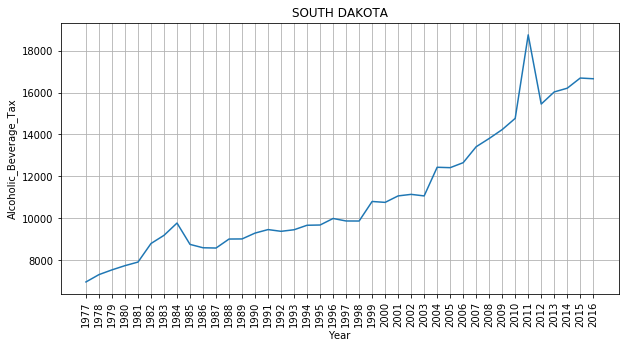

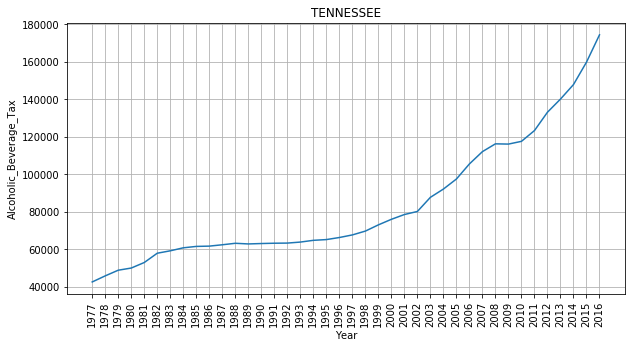

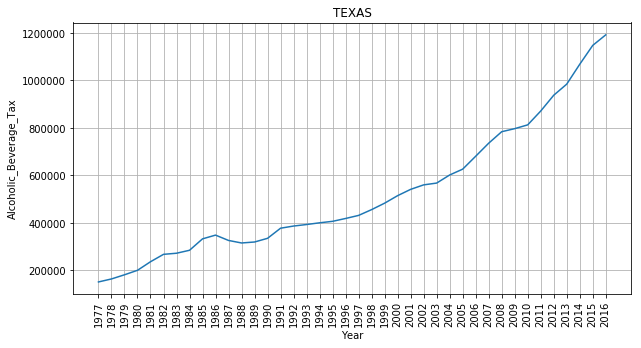

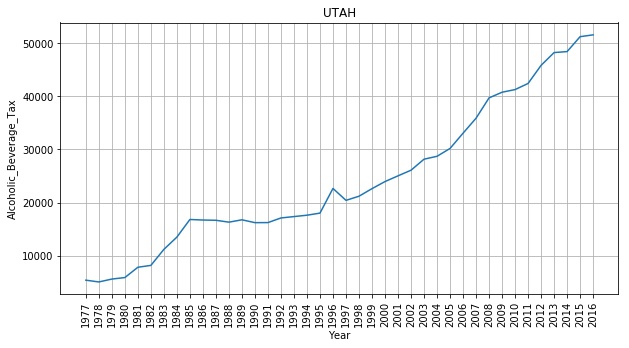

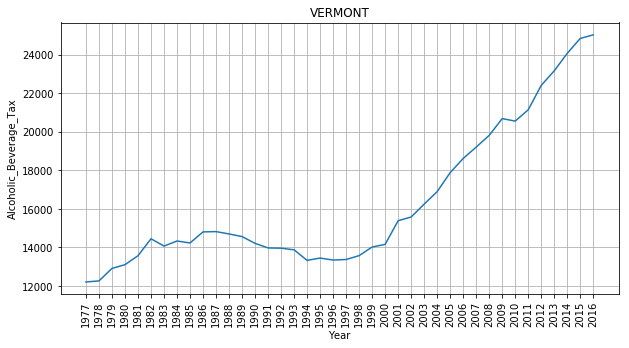

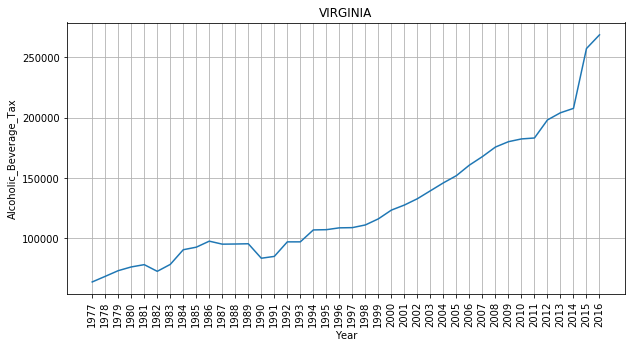

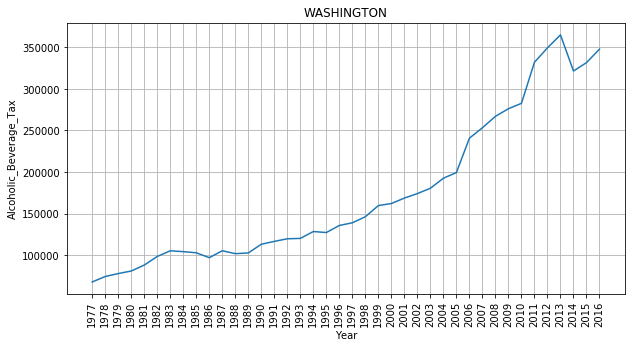

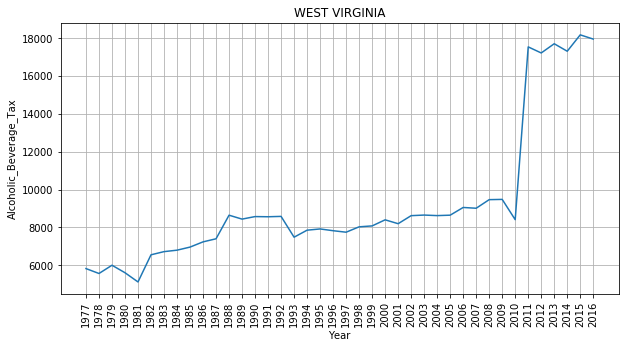

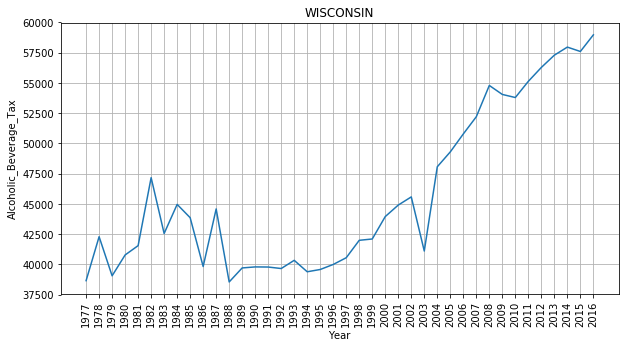

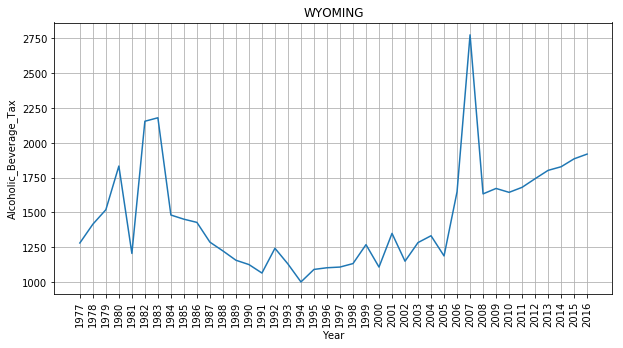

In [26]:
for state in data['State'].drop_duplicates():
    plt.title(state)
    plt.plot(pivoted.loc[state].index, pivoted.loc[state]['Alcoholic_Beverage_Tax'])
    plt.xticks(np.arange(min(pivoted.loc[state].index), max(pivoted.loc[state].index)+1, 1), rotation=90)
    plt.xlabel('Year')
    plt.ylabel('Alcoholic_Beverage_Tax')
    plt.grid(True)
    plt.show()

In [ ]:
interesting_states = ['ALASKA', 'CALIFORNIA', 'COLARADO', 'WASHINGTON DC', 'FLORIDA', 'HAWAII', 'IDAHO', 'IOWA', 'KANSAS', 'MAINE', 'MARYLAND', 'OHIO', 'OREGON', 'WEST VIRGINIA', 'WYOMING']
df = data[data['State'].isin(interesting_states)]
df.head()

In [ ]:
fields[fields['Attribute']=='Alcoholic_Beverage_Tax']

In [ ]:
fields[fields['Property']=='Alcoholic Beverage']

In [ ]:
[key for key in data.keys() if key.startswith('Alcohol')]

In [ ]:
#

In [ ]:
data[data['Alcoholic_Beverage_Lic']==0][['State', 'Year']].nunique()

In [ ]:
for state in data['State'].drop_duplicates():
    plt.title(state)
    plt.plot(data['Year'].drop_duplicates(), data[data['State']==state]['Alcoholic_Beverage_Tax'])
    plt.plot(data['Year'].drop_duplicates(), data[data['State']==state]['Alcoholic_Beverage_Lic'])
    plt.legend(['Alcoholic_Beverage_Tax', 'Alcoholic_Beverage_Lic'])
    plt.show()

In [ ]:
data[data['Alcoholic_Beverage_Lic']==0].shape[0]

In [ ]:
##

In [ ]:
# 

### Columns where less than 10% of the data is missing

In [ ]:
keys = missing[missing<=0.1*len(data)].sort_values().index.tolist()
keys

In [ ]:
key = keys[0]
key

In [ ]:
data[data[key]==0]

In [ ]:
df = data[data['State']=='DELAWARE']
df.head()

In [ ]:
corr_key = df.corr()[key].dropna()
corr_key

In [ ]:
corr_key[corr_key>.99]

In [ ]:
# plt.plot(df['Year'], df['Welf_NEC_Total_Expend'])
# plt.plot(df['Year'], df['Welf_NEC_Direct_Expend'])
plt.plot(df['Year'], df['Welf_NEC_Current_Exp'])
plt.legend(['Welf_NEC_Total_Expend', 'Welf_NEC_Direct_Expend', 'Welf_NEC_Current_Exp'])

In [ ]:
df[['Welf_NEC_Total_Expend', 'Welf_NEC_Direct_Expend']]

In [ ]:
df['diff1'] = df['Welf_NEC_Total_Expend'] - df['Welf_NEC_Direct_Expend']
df['diff2'] = df['Welf_NEC_Total_Expend'] - df['Welf_NEC_Current_Exp']
df.head()

In [ ]:
##

For each of these columns, how many states have all 0 values and how many years have all 0 values

In [ ]:
data[[key for key in data.keys() if data[key].dtype != 'O']].head()

In [ ]:
key = 'Misc_Com_Activ_Constr'

In [ ]:
def missing_values_for(df, x):
    x_wise = pd.pivot_table(df.fillna(0), index=x, aggfunc=np.sum)
    x_wise_zeros = (~x_wise.astype(bool)).sum()
    x_wise_zeros = x_wise_zeros.sort_values(ascending=False)
    return x_wise_zeros

In [ ]:
missing_number_years = missing_values_for(data, 'Year')
missing_number_states = missing_values_for(data, 'State')

In [ ]:
missing_number_years

In [ ]:
missing_number_years = missing_number_years[missing_number_years>0]
missing_number_states = missing_number_states[missing_number_states>0]

In [ ]:
missing_number_years

In [ ]:
key = 'Emp_Retire_Sec_Corp_Bds'

In [ ]:
len(data[data[key]==0])/len(data)

In [ ]:
a = data[data[key]==0][['State', 'Year']]
pd.pivot_table(a, index='State', aggfunc='count')['Year'].sort_values(ascending=False)

In [ ]:
data[(data['State']=='ALABAMA')][['Year', key]]

In [ ]:
data[['State', 'Year', 'Total_Hospital_Total_Exp']]

In [ ]:
for key in missing.sort_values().keys():
    missing_number_states = data[data[key] == 0]['State'].drop_duplicates().count()
    missing_number_years = data[data[key] == 0]['Year'].drop_duplicates().count()
    print(key, 'have missing values for', missing_number_years, 'years in', missing_number_states, 'states')

In [ ]:
data[['State', 'Year', 'Misc_Com_Activ_Constr']]

In [ ]:
state_wise = data.groupby('State')

In [ ]:
missing_years_per_state = {}
for state in data['State'].drop_duplicates():
    print(state)
    one_state = state_wise.get_group(state)
    missing_number_of_years = (one_state[missing.keys()]==0).sum()
    missing_number_of_years = missing_number_of_years[missing_number_of_years > 0]
    

In [ ]:
a = (state_wise.get_group('ALABAMA')[missing.keys()]==0).sum().sort_values()
a[a>0].sort_index().keys()

In [ ]:
corr = data.corr()
# corr_norm = data_norm.corr()

In [ ]:
corr.head()

In [ ]:
corr_norm.head()

In [ ]:
missing

In [ ]:
key = 'Misc_Com_Activ_Constr'

pd.pivot_table(data[['State', 'Year'] + corr[corr[key].abs()>0.5].index.tolist()], )

In [ ]:
data

In [ ]:
non_missing_keys = missing[missing==missing.min()].keys().tolist()
non_missing_keys

In [ ]:
data[['Hosp_Other_Cap_Outlay'] + non_missing_keys]

In [ ]:
corr = data[missing[missing > 0].keys()].corr()
corr

In [ ]:
corr[corr>0.8]

In [ ]:
data[data.fillna(0)['Hosp_Other_Cap_Outlay'] != 0]

In [ ]:
x = data.fillna(0).astype(bool).sum()
list_zero_keys = x[x==0].sort_index().keys().tolist()
print(len(list_zero_keys))
list_zero_keys

In [ ]:
print(len(data.keys()))
data = data.drop(columns=list_zero_keys)
print(len(data.keys()))

### Remaining Columns

In [ ]:
def analyze(df, x):
    x_wise = pd.pivot_table(df, index=x, aggfunc=(np.sum))
    x_wise_zeros = (~x_wise.astype(bool)).sum()
    x_wise_zeros = x_wise_zeros.sort_values(ascending=False)
    return x_wise_zeros



In [ ]:
year_wise_zeros = analyze2(data, 'Year')
print('Number of years when the column had all zero values:')
print(year_wise_zeros[year_wise_zeros>0])

In [ ]:
print('Total number of Years:', data['Year'].drop_duplicates().count())

Lets drop those columns which have missing values (zeros) for more than 20 years out of 40 years

In [ ]:
print(len(data.keys()))
data = data.drop(columns=year_wise_zeros[year_wise_zeros > 20].keys().tolist())
print(len(data.keys()))

In [ ]:
state_wise_zeros = analyze2(data, 'State')

print('Number of states for which these columns had all zero values:')
state_wise_zeros[state_wise_zeros>0]

In [ ]:
len(data['State'].drop_duplicates())

Lets drop those columns which have missing values (zeros) for more than 40 out of 51 states

In [ ]:
print(len(data.keys()))
data = data.drop(columns=state_wise_zeros[state_wise_zeros > 40].keys().tolist())
print(len(data.keys()))